In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data

df = pd.read_csv('bank_churn_clean.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bankDesc = []

for i in df.columns:
    bankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = bankDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,CreditScore,int64,0,0.0,460,"[461, 471]"
1,Geography,object,0,0.0,3,"[France, Spain]"
2,Gender,object,0,0.0,2,"[Female, Male]"
3,Age,int64,0,0.0,70,"[27, 33]"
4,Tenure,int64,0,0.0,11,"[10, 8]"
5,Balance,float64,0,0.0,6382,"[93547.23, 120623.21]"
6,NumOfProducts,int64,0,0.0,4,"[2, 1]"
7,HasCrCard,int64,0,0.0,2,"[0, 1]"
8,IsActiveMember,int64,0,0.0,2,"[0, 1]"
9,EstimatedSalary,float64,0,0.0,9948,"[160110.65, 34749.65]"


In [4]:
num_var = df._get_numeric_data().columns
cat_var= list(set(df.columns) - set(num_var))
print(num_var)
print('===')
print(cat_var)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
===
['Gender', 'Geography']


In [5]:
pd.concat([df.head(), df.tail()])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Correlation

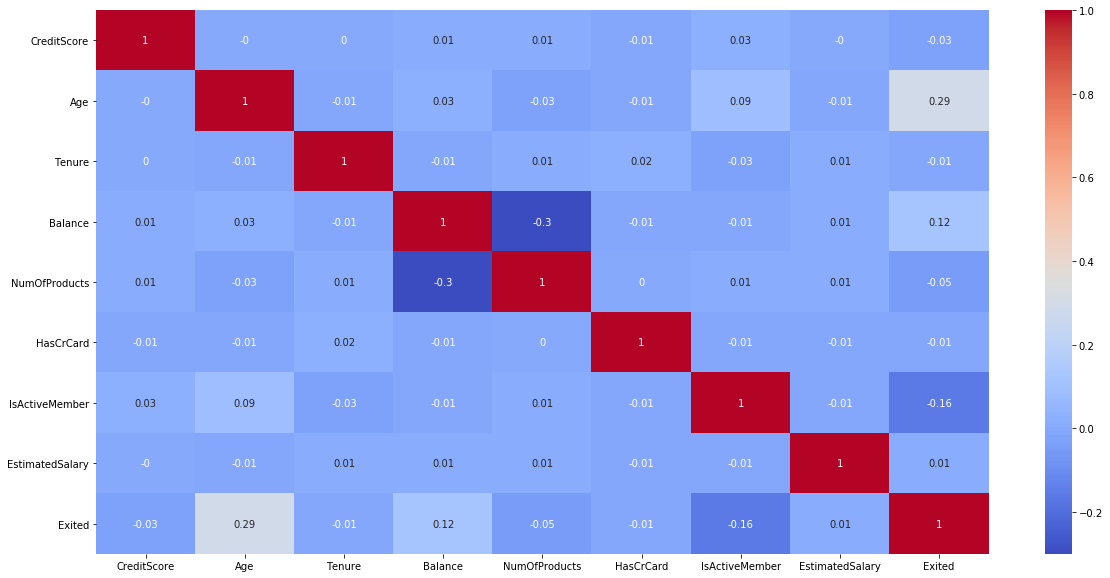

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')

In [7]:
df.corr()['Exited'].sort_values(ascending = True)

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012374
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

## Data Preprocessing

In [8]:
# float => int

import math
for i in range(len(df)):
    df.Balance[i] = math.ceil(df.Balance[i])
    df.EstimatedSalary[i] = math.ceil(df.EstimatedSalary[i])
df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [9]:
# One Hot Encoding 'Geography' feature

df = pd.get_dummies(data=df, columns=['Geography'])
df = pd.get_dummies(data=df, columns=['Gender'])

In [10]:
df.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9995,771,39,5,0,2,1,0,96271,0,1,0,0,0,1
9996,516,35,10,57370,1,1,1,101700,0,1,0,0,0,1
9997,709,36,7,0,1,0,1,42086,1,1,0,0,1,0
9998,772,42,3,75076,2,1,0,92889,1,0,1,0,0,1
9999,792,28,4,130143,1,1,0,38191,0,1,0,0,1,0


In [11]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = dataDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,CreditScore,int64,0,0.0,460,"[756, 793]"
1,Age,int64,0,0.0,70,"[32, 45]"
2,Tenure,int64,0,0.0,11,"[0, 10]"
3,Balance,int32,0,0.0,6206,"[132726, 111853]"
4,NumOfProducts,int64,0,0.0,4,"[3, 2]"
5,HasCrCard,int64,0,0.0,2,"[0, 1]"
6,IsActiveMember,int64,0,0.0,2,"[0, 1]"
7,EstimatedSalary,int32,0,0.0,9720,"[38020, 58602]"
8,Exited,int64,0,0.0,2,"[0, 1]"
9,Geography_France,uint8,0,0.0,2,"[0, 1]"


### Null Hypothesis :

- `Gender` is corelated with `Exited`
- `Geography` is correlated with `Exited`
- `Tenure` is correlated with `Exited`
- `NumOfProducts` correlated with `Exited`
- `HasCrCard` is correlated with `Exited`
- `IsActiveMember` is correlated with `Exited`

## Feature Selection

In [12]:
df.drop(columns = ['EstimatedSalary'], inplace = True)
pd.concat([df.head(), df.tail()])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,1,1,0,0,1,0
1,608,41,1,83808,1,0,1,0,0,0,1,1,0
2,502,42,8,159661,3,1,0,1,1,0,0,1,0
3,699,39,1,0,2,0,0,0,1,0,0,1,0
4,850,43,2,125511,1,1,1,0,0,0,1,1,0
9995,771,39,5,0,2,1,0,0,1,0,0,0,1
9996,516,35,10,57370,1,1,1,0,1,0,0,0,1
9997,709,36,7,0,1,0,1,1,1,0,0,1,0
9998,772,42,3,75076,2,1,0,1,0,1,0,0,1
9999,792,28,4,130143,1,1,0,0,1,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.80, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(8000, 12)
(2000, 12)


In [15]:
print((pd.crosstab(index=df['Exited'], columns='count', normalize=True)*100).round(2))

print('=' *100)
print(df.Exited.value_counts())

# Dataset imbalance

col_0   count
Exited       
0       79.63
1       20.37
0    7963
1    2037
Name: Exited, dtype: int64


In [16]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
2151,753,57,7,0,1,1,0,1,0,0,0,1,1
8392,739,32,3,102129,1,1,0,0,1,0,0,1,1
5006,755,37,0,113866,2,1,1,0,1,0,1,0,0
4117,561,37,5,0,2,1,0,1,0,0,0,1,0
7182,692,49,6,110541,2,0,1,0,1,0,0,1,0


In [17]:
df_train['Exited'].value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [18]:
non_churn = df_train[df_train['Exited'] == 0] ## Kelas Majority
churn = df_train[df_train['Exited'] == 1] ## Kelas Minority

In [19]:
from sklearn.utils import resample

churn_oversample = resample(churn, ## Kelas Minority
                           replace=True,
                           n_samples = len(non_churn), ## Jumlah dari Kelas Majority
                           random_state = 42)
df_OverSampled = pd.concat([non_churn, churn_oversample])
df_OverSampled['Exited'].value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [20]:
X_train = df_OverSampled.drop(columns='Exited')
y_train = df_OverSampled['Exited']

# Machine Learning

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

model_Logreg = LogisticRegression()
model_Logreg.fit(X_train, y_train)
y_pred_Logreg = model_Logreg.predict(X_test)
y_pred_Logreg_train = model_Logreg.predict(X_train)

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [23]:
precision_Logreg = precision_score(y_test, y_pred_Logreg)
recall_Logreg = recall_score(y_test, y_pred_Logreg)
f1score_Logreg = f1_score(y_test, y_pred_Logreg)
acc_Logreg = accuracy_score(y_test, y_pred_Logreg)

recall_Logreg_train = recall_score(y_train, y_pred_Logreg_train)

print(f"Train Recall Logistic Regression : {recall_Logreg_train}")
print(f"Test recall Score Logistic Regression : {recall_Logreg}")

Train Recall Logistic Regression : 0.6671899529042387
Test recall Score Logistic Regression : 0.6756756756756757


In [24]:
print(classification_report(y_test, y_pred_Logreg))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1593
           1       0.32      0.68      0.44       407

    accuracy                           0.64      2000
   macro avg       0.60      0.66      0.59      2000
weighted avg       0.77      0.64      0.68      2000



In [25]:
cm_Logreg = confusion_matrix(y_test, y_pred_Logreg, labels = [1,0])
df_Logreg = pd.DataFrame(data = cm_Logreg, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_Logreg

,Prediksi 1,Prediksi 0
Aktual 1,275,132
Aktual 0,579,1014


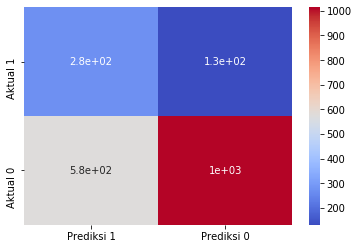

In [26]:
sns.heatmap(df_Logreg, annot = True, cmap='coolwarm')

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)
y_pred_KNN_train = model_KNN.predict(X_train)

In [28]:
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1score_KNN = f1_score(y_test, y_pred_KNN)
acc_KNN = accuracy_score(y_test, y_pred_KNN)

recall_KNN_train = recall_score(y_train, y_pred_KNN_train)

print(f"Train Recall Score KNN : {recall_Logreg_train}")
print(f"Test Recall Score KNN : {recall_KNN}")

Train Recall Score KNN : 0.6671899529042387
Test Recall Score KNN : 0.4742014742014742


In [29]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.82      0.63      0.71      1593
           1       0.25      0.47      0.32       407

    accuracy                           0.60      2000
   macro avg       0.53      0.55      0.52      2000
weighted avg       0.71      0.60      0.63      2000



In [30]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels = [1,0])
df_KNN = pd.DataFrame(data = cm_KNN, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN

,Prediksi 1,Prediksi 0
Aktual 1,193,214
Aktual 0,593,1000


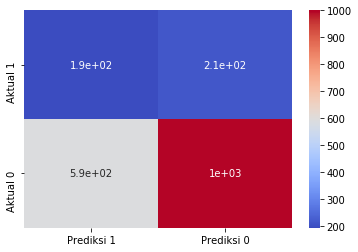

In [31]:
sns.heatmap(df_KNN, annot = True, cmap='coolwarm')

## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred_RF = model_RF.predict(X_test)
y_pred_RF_train = model_RF.predict(X_train)

In [33]:
precision_RF = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1score_RF = f1_score(y_test, y_pred_RF)
acc_RF = accuracy_score(y_test, y_pred_RF)

recall_RF_train = recall_score(y_train, y_pred_RF_train)

print(f"Train Recall Score Random Forest : {recall_RF_train}")
print(f"Test Recall Score Random Forest : {recall_RF}")

Train Recall Score Random Forest : 1.0
Test Recall Score Random Forest : 0.5331695331695332


In [34]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.53      0.58       407

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.83      0.84      0.84      2000



In [35]:
cm_RF = confusion_matrix(y_test, y_pred_RF, labels = [1,0])
df_RF = pd.DataFrame(data = cm_RF, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_RF

,Prediksi 1,Prediksi 0
Aktual 1,217,190
Aktual 0,124,1469


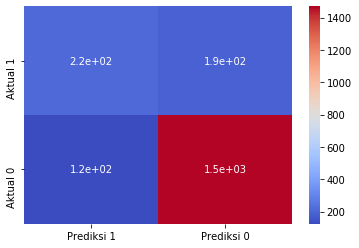

In [36]:
sns.heatmap(df_RF, annot = True, cmap='coolwarm')

## XG Boost

In [37]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
y_pred_XGB_train = model_XGB.predict(X_train)

In [38]:
precision_XGB = precision_score(y_test, y_pred_XGB)
recall_XGB = recall_score(y_test, y_pred_XGB)
f1score_XGB = f1_score(y_test, y_pred_XGB)
acc_XGB = accuracy_score(y_test, y_pred_XGB)

recall_XGB_train = recall_score(y_train, y_pred_XGB_train)

print(f"Train Recall Score XG Boost : {recall_XGB_train}")
print(f"Test Recall Score XG Boost : {recall_XGB}")

Train Recall Score XG Boost : 0.7843014128728415
Test Recall Score XG Boost : 0.769041769041769


In [39]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.77      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.73      2000
weighted avg       0.84      0.80      0.81      2000



In [40]:
cm_XGB = confusion_matrix(y_test, y_pred_XGB, labels = [1,0])
df_XGB = pd.DataFrame(data = cm_XGB, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_XGB

,Prediksi 1,Prediksi 0
Aktual 1,313,94
Aktual 0,313,1280


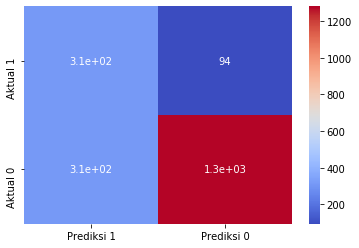

In [41]:
sns.heatmap(df_XGB, annot = True, cmap='coolwarm')

## SVC

In [42]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train, y_train)
y_pred_SVC = model_SVC.predict(X_test)
y_pred_SVC_train = model_SVC.predict(X_train)

In [43]:
precision_SVC = precision_score(y_test, y_pred_SVC)
recall_SVC = recall_score(y_test, y_pred_SVC)
f1score_SVC = f1_score(y_test, y_pred_SVC)
acc_SVC = accuracy_score(y_test, y_pred_SVC)

recall_SVC_train = recall_score(y_train, y_pred_SVC_train)

print(f"Train Recall Score SVC : {recall_SVC_train}")
print(f"Test Recall Score SVC : {recall_SVC}")

Train Recall Score SVC : 0.7499215070643642
Test Recall Score SVC : 0.7371007371007371


In [44]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.85      0.39      0.53      1593
           1       0.24      0.74      0.36       407

    accuracy                           0.46      2000
   macro avg       0.54      0.56      0.45      2000
weighted avg       0.73      0.46      0.50      2000



In [45]:
cm_SVC = confusion_matrix(y_test, y_pred_SVC, labels = [1,0])
df_SVC = pd.DataFrame(data = cm_SVC, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_SVC

,Prediksi 1,Prediksi 0
Aktual 1,300,107
Aktual 0,974,619


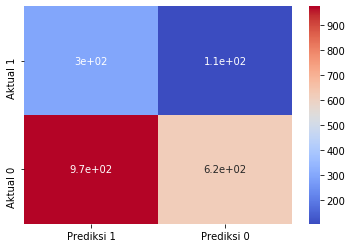

In [46]:
sns.heatmap(df_SVC, annot = True, cmap='coolwarm')

## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
ModelDT = DecisionTreeClassifier()
ModelDT.fit(X_train, y_train)
y_pred_DT = ModelDT.predict(X_test)
y_pred_DT_train = ModelDT.predict(X_train)

In [48]:
precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
f1score_DT = f1_score(y_test, y_pred_DT)
acc_DT = accuracy_score(y_test, y_pred_DT)

recall_DT_train = recall_score(y_train, y_pred_DT_train)

print(f"Train Recall Score SVC : {recall_DT_train}")
print(f"Test Recall Score SVC : {recall_DT}")

Train Recall Score SVC : 1.0
Test Recall Score SVC : 0.4742014742014742


In [49]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.49      0.47      0.48       407

    accuracy                           0.79      2000
   macro avg       0.68      0.67      0.68      2000
weighted avg       0.79      0.79      0.79      2000



In [50]:
cm_DT = confusion_matrix(y_test, y_pred_DT, labels = [1,0])
df_DT = pd.DataFrame(data = cm_DT, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT

,Prediksi 1,Prediksi 0
Aktual 1,193,214
Aktual 0,202,1391


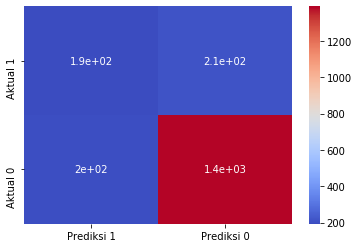

In [51]:
sns.heatmap(df_DT, annot = True, cmap='coolwarm')

In [52]:
result_basemodel = {
    "LogisticReg": [recall_Logreg, recall_Logreg_train],
    "KNN": [recall_KNN, recall_KNN_train],
    "Random Forest" : [recall_RF, recall_RF_train],
    "XG Boost" : [recall_XGB, recall_XGB_train],
    "SVC" : [recall_SVC, recall_SVC_train],
    "DecisionTree": [recall_DT, recall_DT_train] }

pd.DataFrame(data = result_basemodel, index = ['Recall Test', 'Recall Train'])

,LogisticReg,KNN,Random Forest,XG Boost,SVC,DecisionTree
Recall Test,0.675676,0.474201,0.53317,0.769042,0.737101,0.474201
Recall Train,0.667190,0.952119,1.00000,0.784301,0.749922,1.000000


# Hyperparameter Tuning

## Logistic Regression Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
logreg_tuned = LogisticRegression()
param_logreg = {'C' : [1, 0.5, 0.1, 0.05],
               'penalty' :['l2','l1', 'elasticnet', 'none'],
                'class_weight' : [dict, 'balanced'],
               'max_iter' : [10, 100, 500]}


model_logreg_tuned = GridSearchCV(estimator = logreg_tuned, param_grid = param_logreg, 
                                  cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')
model_logreg_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   16.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 0.05],
                         'class_weight': [<class 'dict'>, 'balanced'],
                         'max_iter': [10, 100, 500],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall',

In [55]:
model_logreg_tuned.best_estimator_

LogisticRegression(C=1, class_weight=<class 'dict'>, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
logreg_tuned_ = model_logreg_tuned.best_estimator_
y_pred_logreg_tuned = logreg_tuned_.predict(X_test)
y_pred_logreg_train_tuned = logreg_tuned_.predict(X_train)

precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
f1score_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)

recall_logreg_tuned_train = recall_score(y_train, y_pred_logreg_train_tuned)

print(f"Train Recall LogReg Tuned : {recall_logreg_tuned_train}")
print(f"Test Recall LogReg Tuned : {recall_logreg_tuned}")


Train Recall LogReg Tuned : 0.7505494505494505
Test Recall LogReg Tuned : 0.7371007371007371


In [57]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.85      0.39      0.53      1593
           1       0.24      0.74      0.36       407

    accuracy                           0.46      2000
   macro avg       0.54      0.56      0.45      2000
weighted avg       0.73      0.46      0.50      2000



In [58]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_tuned

,Prediksi 1,Prediksi 0
Aktual 1,300,107
Aktual 0,974,619


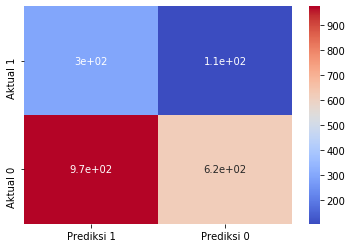

In [59]:
sns.heatmap(df_logreg_tuned, annot = True, cmap='coolwarm')

## KNN Tuning

In [60]:
KNN_tuned = KNeighborsClassifier()
param_KNN = {'n_neighbors': [1, 3, 5, 7, 9, 15],
            'weights': ['uniform', 'distance'],
            'p': [2,1, 0.2],
             'leaf_size' : [1, 5, 15],
            'algorithm': ['auto', 'kd_tree']}

model_KNN_tuned = GridSearchCV(estimator = KNN_tuned, param_grid = param_KNN, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_KNN_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 5, 15],
                         'n_neighbors': [1, 3, 5, 7, 9, 15], 'p': [2, 1, 0.2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [61]:
model_KNN_tuned.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=1,
                     weights='distance')

In [62]:
KNN_tuned_ = model_KNN_tuned.best_estimator_
y_pred_KNN_tuned = KNN_tuned_.predict(X_test)
y_pred_KNN_train_tuned = KNN_tuned_.predict(X_train)

precision_KNN_tuned = precision_score(y_test, y_pred_KNN_tuned)
recall_KNN_tuned = recall_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
f1score_KNN_tuned = f1_score(y_test, y_pred_KNN_tuned)

recall_KNN_tuned_train = recall_score(y_train, y_pred_KNN_train_tuned)

print(f"Train Recall KNN Tuned : {recall_KNN_tuned_train}")
print(f"Test Recall KNN Tuned : {recall_KNN_tuned}")

Train Recall KNN Tuned : 1.0
Test Recall KNN Tuned : 0.4864864864864865


In [63]:
print(classification_report(y_test, y_pred_KNN_tuned))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1593
           1       0.26      0.49      0.34       407

    accuracy                           0.61      2000
   macro avg       0.54      0.56      0.53      2000
weighted avg       0.71      0.61      0.64      2000



In [64]:
cm_KNN_tuned = confusion_matrix(y_test, y_pred_KNN_tuned, labels = [1,0])
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN_tuned

,Prediksi 1,Prediksi 0
Aktual 1,198,209
Aktual 0,577,1016


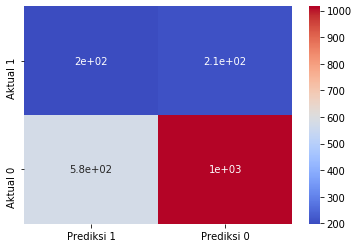

In [65]:
sns.heatmap(df_KNN_tuned, annot = True, cmap='coolwarm')

## Random Forest Tuning

In [66]:
RF_tuned = RandomForestClassifier()
param_RF = {'n_estimators': [50, 500],
            'criterion' : ['gini', 'entropy'],
            'min_samples_split' : [2, 5, 25],
            'min_samples_leaf' : [1, 2, 10]}

model_RF_tuned = GridSearchCV(estimator = RF_tuned, param_grid = param_RF, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_RF_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [67]:
model_RF_tuned.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
RF_tuned_ = model_RF_tuned.best_estimator_
y_pred_RF_tuned = RF_tuned_.predict(X_test)
y_pred_RF_train_tuned = RF_tuned_.predict(X_train)

precision_RF_tuned = precision_score(y_test, y_pred_RF_tuned)
recall_RF_tuned = recall_score(y_test, y_pred_RF_tuned)
acc_RF_tuned = accuracy_score(y_test, y_pred_RF_tuned)
f1score_RF_tuned = f1_score(y_test, y_pred_RF_tuned)

recall_RF_tuned_train = recall_score(y_train, y_pred_RF_train_tuned)

print(f"Train Recall RF Tuned : {recall_RF_tuned_train}")
print(f"Test Recall RF Tuned : {recall_RF_tuned}")


Train Recall RF Tuned : 1.0
Test Recall RF Tuned : 0.547911547911548


In [69]:
print(classification_report(y_test, y_pred_RF_tuned))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.55      0.59       407

    accuracy                           0.85      2000
   macro avg       0.76      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [70]:
cm_RF_tuned = confusion_matrix(y_test, y_pred_RF_tuned, labels = [1,0])
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_RF_tuned

,Prediksi 1,Prediksi 0
Aktual 1,223,184
Aktual 0,125,1468


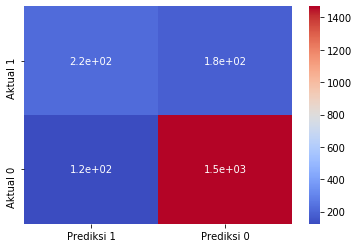

In [71]:
sns.heatmap(df_RF_tuned, annot = True, cmap='coolwarm')

## Decision Tree Tuning

In [72]:
DT_tuned = DecisionTreeClassifier()
param_DT = {"max_depth": [1, 2, 3, 4, None],
            "criterion": ["gini", "entropy"] 
           }

model_DT_tuned = GridSearchCV(estimator = DT_tuned, param_grid = param_DT, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_DT_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [73]:
model_DT_tuned.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
DT_tuned_ = model_DT_tuned.best_estimator_
y_pred_DT_tuned = DT_tuned_.predict(X_test)
y_pred_DT_train_tuned = DT_tuned_.predict(X_train)

precision_DT_tuned = precision_score(y_test, y_pred_DT_tuned)
recall_DT_tuned = recall_score(y_test, y_pred_DT_tuned)
acc_DT_tuned = accuracy_score(y_test, y_pred_DT_tuned)
f1score_DT_tuned = f1_score(y_test, y_pred_DT_tuned)

recall_DT_tuned_train = recall_score(y_train, y_pred_DT_train_tuned)

print(f"Train Recall DT Tuned : {recall_DT_tuned_train}")
print(f"Test Recall DT Tuned : {recall_DT_tuned}")


Train Recall DT Tuned : 1.0
Test Recall DT Tuned : 0.5012285012285013


In [75]:
print(classification_report(y_test, y_pred_DT_tuned))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.50      0.50      0.50       407

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [76]:
cm_DT_tuned = confusion_matrix(y_test, y_pred_DT_tuned , labels = [1,0])
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT_tuned

,Prediksi 1,Prediksi 0
Aktual 1,204,203
Aktual 0,200,1393


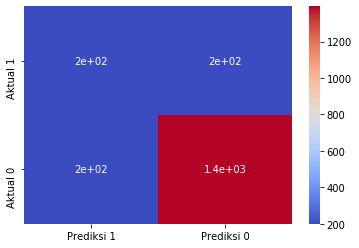

In [77]:
sns.heatmap(df_DT_tuned, annot = True, cmap='coolwarm')

## XG Boost Tuning

In [78]:
XGB_tuned = XGBClassifier()
param_XGB ={'max_depth': [1, 7, 1.5, 6] ,
             'n_estimators': [100, 150, 500], 
             'gamma': [0, 2, 0.5, 1]}

model_XGB_tuned = GridSearchCV(estimator = XGB_tuned, param_grid = param_XGB, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_XGB_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 2, 0.5, 1], 'max_depth': [1, 7, 1.5, 6],
                         'n_estimators': [100, 150, 500]},
             pre_dispatch='2*n_jobs', ref

In [79]:
XGB_tuned_ = model_XGB_tuned.best_estimator_
y_pred_XGB_tuned = XGB_tuned_.predict(X_test)
y_pred_XGB_train_tuned = XGB_tuned_.predict(X_train)

precision_XGB_tuned = precision_score(y_test, y_pred_XGB_tuned)
recall_XGB_tuned = recall_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned = accuracy_score(y_test, y_pred_XGB_tuned)
f1score_XGB_tuned = f1_score(y_test, y_pred_XGB_tuned)

recall_XGB_tuned_train = recall_score(y_train, y_pred_XGB_train_tuned)

print(f"Train Recall XGB Tuned : {recall_XGB_tuned_train}")
print(f"Test Recall XGB Tuned : {recall_XGB_tuned}")


Train Recall XGB Tuned : 0.9929356357927787
Test Recall XGB Tuned : 0.5675675675675675


In [80]:
print(classification_report(y_test, y_pred_XGB_tuned))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1593
           1       0.59      0.57      0.58       407

    accuracy                           0.83      2000
   macro avg       0.74      0.73      0.74      2000
weighted avg       0.83      0.83      0.83      2000



In [81]:
cm_XGB_tuned = confusion_matrix(y_test, y_pred_XGB_tuned , labels = [1,0])
df_XGB_tuned = pd.DataFrame(data = cm_XGB_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_XGB_tuned

,Prediksi 1,Prediksi 0
Aktual 1,231,176
Aktual 0,161,1432


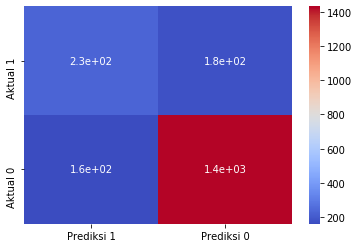

In [82]:
sns.heatmap(df_XGB_tuned, annot = True, cmap='coolwarm')

## SVC Tuning

In [83]:
SVC_tuned = SVC()
param_SVC ={'C' : [0.005, 0.001, 0.05, 0.01, 0.5, 1],
            'max_iter': [2000, 3000, 4000],
            'kernel': ['rbf', 'sigmoid']}

model_SVC_tuned = GridSearchCV(estimator = SVC_tuned, param_grid = param_SVC, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_SVC_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  5.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.005, 0.001, 0.05, 0.01, 0.5, 1],
                         'kernel': ['rbf', 'sigmoid'],
                         'max_iter': [2000, 3000, 4000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [84]:
model_SVC_tuned.best_estimator_

SVC(C=0.005, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=3000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
SVC_tuned_ = model_SVC_tuned.best_estimator_
y_pred_SVC_tuned = SVC_tuned_.predict(X_test)
y_pred_SVC_train_tuned = SVC_tuned_.predict(X_train)

precision_SVC_tuned = precision_score(y_test, y_pred_SVC_tuned)
recall_SVC_tuned = recall_score(y_test, y_pred_SVC_tuned)
acc_SVC_tuned = accuracy_score(y_test, y_pred_SVC_tuned)
f1score_SVC_tuned = f1_score(y_test, y_pred_SVC_tuned)

recall_SVC_tuned_train = recall_score(y_train, y_pred_SVC_train_tuned)

print(f"Train Recall SVC Tuned : {recall_SVC_tuned_train}")
print(f"Test Recall SVC Tuned : {recall_SVC_tuned}")


Train Recall SVC Tuned : 0.6240188383045526
Test Recall SVC Tuned : 0.6461916461916462


In [86]:
print(classification_report(y_test, y_pred_SVC_tuned))

              precision    recall  f1-score   support

           0       0.77      0.31      0.44      1593
           1       0.19      0.65      0.30       407

    accuracy                           0.38      2000
   macro avg       0.48      0.48      0.37      2000
weighted avg       0.65      0.38      0.41      2000



In [87]:
cm_SVC_tuned = confusion_matrix(y_test, y_pred_SVC_tuned , labels = [1,0])
df_SVC_tuned = pd.DataFrame(data = cm_SVC_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_SVC_tuned

,Prediksi 1,Prediksi 0
Aktual 1,263,144
Aktual 0,1106,487


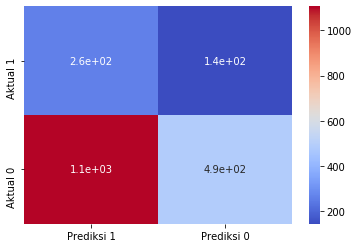

In [88]:
sns.heatmap(df_SVC_tuned, annot = True, cmap='coolwarm')

In [89]:
print("Tuned")
result_tuned = {
    "LogisticReg Tuned": [recall_logreg_tuned, recall_logreg_tuned_train],
    "KNN Tuned": [recall_KNN_tuned, recall_KNN_tuned_train],
    "Random Forest Tuned" : [recall_RF_tuned, recall_RF_tuned_train],
    "DecisionTree Tuned": [recall_DT_tuned, recall_DT_tuned_train],
    "XG Boost Tuned" : [recall_XGB_tuned, recall_XGB_tuned_train],
    "SVC Tuned" : [recall_SVC_tuned, recall_SVC_tuned_train]}
 
pd.DataFrame(data = result_tuned, index = ['Recall Test', 'Recall Train'])

Tuned


,LogisticReg Tuned,KNN Tuned,Random Forest Tuned,DecisionTree Tuned,XG Boost Tuned,SVC Tuned
Recall Test,0.737101,0.486486,0.547912,0.501229,0.567568,0.646192
Recall Train,0.750549,1.000000,1.000000,1.000000,0.992936,0.624019


In [90]:
print("Base Model and After Tuning")
result_ALL = {
    "LogisticReg": [recall_Logreg, recall_Logreg_train],
    "KNN": [recall_KNN, recall_KNN_train],
    "Random Forest" : [recall_RF, recall_RF_train],
    "XG Boost" : [recall_XGB, recall_XGB_train],
    "SVC" : [recall_SVC, recall_SVC_train],
    "Decision Tree": [recall_DT, recall_DT_train],
    "LogisticReg Tuned": [recall_logreg_tuned, recall_logreg_tuned_train],
    "KNN Tuned": [recall_KNN_tuned, recall_KNN_tuned_train],
    "Random Forest Tuned" : [recall_RF_tuned, recall_RF_tuned_train],
    "Decision Tree Tuned": [recall_DT_tuned, recall_DT_tuned_train],
    "XG Boost Tuned" : [recall_XGB_tuned, recall_XGB_tuned_train],
    "SVC Tuned" : [recall_SVC_tuned, recall_SVC_tuned_train]}

pd.DataFrame(data = result_ALL, index = ['Recall Test', 'Recall Train']).T

Base Model and After Tuning


,Recall Test,Recall Train
LogisticReg,0.675676,0.667190
KNN,0.474201,0.952119
Random Forest,0.533170,1.000000
XG Boost,0.769042,0.784301
SVC,0.737101,0.749922
Decision Tree,0.474201,1.000000
LogisticReg Tuned,0.737101,0.750549
KNN Tuned,0.486486,1.000000
Random Forest Tuned,0.547912,1.000000
Decision Tree Tuned,0.501229,1.000000


## Testing proba

In [95]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5006,755,37,0,113866,2,1,1,0,1,0,1,0
4117,561,37,5,0,2,1,0,1,0,0,0,1
7182,692,49,6,110541,2,0,1,0,1,0,0,1
3522,659,38,9,0,2,1,1,1,0,0,1,0
741,546,24,8,156326,1,1,1,1,0,0,0,1


In [97]:
user1 = [480, 30, 2, 10000, 1, 1, 1, 1, 0, 0, 0, 1]
model_logreg_tuned.predict([user1])[0]

0

In [98]:
user2 = [790, 60, 1, 50000, 1, 0, 1, 0, 0, 1, 1, 0]
model_logreg_tuned.predict([user2])[0]

1

In [105]:
user3 = [400, 26, 0, 100000, 2, 0, 0, 1, 0, 0, 1, 0]
model_logreg_tuned.predict([user3])[0]

1

In [107]:
user4 = [800, 50, 3, 100000, 2, 1, 0, 0, 1, 0, 1, 0]
model_logreg_tuned.predict([user4])[0]

1

In [109]:
user5 = [600, 30, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
model_logreg_tuned.predict([user5])[0]

0

## Export Model

In [110]:
import joblib
joblib.dump(model_logreg_tuned,'bank-model_logreg_tuned')

['bank-model_logreg_tuned']